In [43]:
!pip install control

In [2]:
import control
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
# Define the transfer function
num = [1, 23]
den = [1, 1, -1.19]
G = control.TransferFunction(num, den)


## Question 1
- The system is unstable as we can see a pole in the right hand side i.e. positive

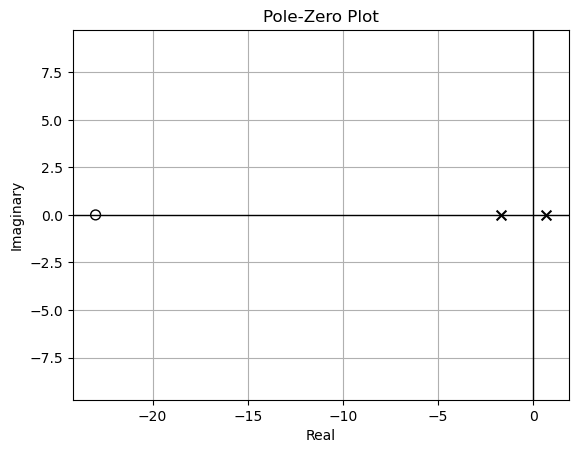


    s + 23
--------------
s^2 + s - 1.19

[-1.7+0.j  0.7+0.j]


In [4]:
# Plot the pole-zero plot
control.pzmap(G)

# Set plot labels and title
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero Plot')

# Display the plot
plt.grid(True)
plt.show()
print(G)
print(control.pole(G))

## Question 2

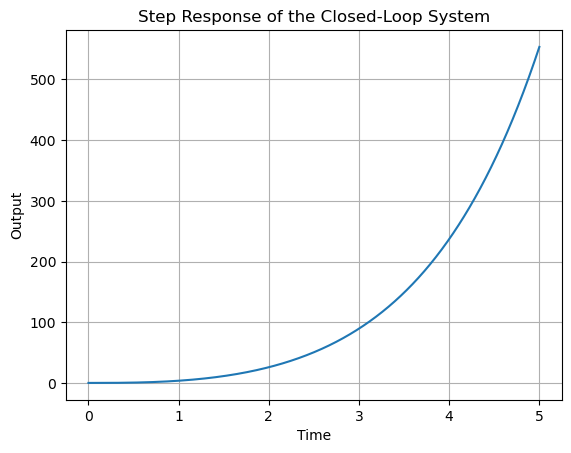

In [96]:
# Generate the step input
t = np.linspace(0, 5, 1000)  # time vector
u = np.ones_like(t)  # step input vector

# Simulate the step response of the closed-loop system
t, y = control.step_response(G, T=t, input=u)

# Plot the step response
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Step Response of the Closed-Loop System')
plt.grid(True)
plt.show()

## Question 3
To determine the minimum value of 𝑁 for which the closed-loop system has zero steady-state error for a step input, we can use the steady-state error equation along with the **final value theorem**.

The steady-state error equation for a Type-0 system with a step input is given by:
$e_{ss} = \lim_{{s \to 0}} s \cdot \frac{1}{{1 + G(s) \cdot C(s)}}$

where $(e_{ss})$ represents the steady-state error, \(G(s)\) is the open-loop transfer function, and \(C(s)\) is the controller transfer function.

In this case, the controller transfer function is given as:
$C(s) = \frac{{\bar{C}(s)}}{{s^N}}$

To achieve zero steady-state error for a step input, we need to ensure that the steady-state error $e_{ss}$ becomes zero. Thus, we set up the equation as:
$lim_{{s \to 0}}$ $s$ $\cdot \frac{1}{{1 + G(s) \cdot \frac{{\bar{C}(s)}}{{s^N}}}}$ = 0

Using the final value theorem, the above equation simplifies to:
$lim_{{s \to 0}} s \cdot G(s) \cdot \frac{{\bar{C}(s)}}{{s^N}} = 0$

Taking the limit $(s \to 0)$ means evaluating the transfer function at $(s = 0).$ Therefore, we need to evaluate the transfer function $(G(0))$ at $(s = 0).$ If $(G(0))$ is non-zero, then we require $(N \geq 1)$ for the steady-state error to be zero. If $(G(0) = 0)$, then $(N = 0)$ is sufficient for zero steady-state error.

So, in summary:
- If $(G(0) \neq 0)$, then the minimum value of $(N)$ required is 1.
- If $(G(0) = 0)$, then the minimum value of $(N)$ required is 0.

Therefore, the minimum value of $N$ such that the closed-loop system has zero steady-state error for a step input depends on the value of $G(0)$ at $s = 0$.

So, The new transfer function to evaluate:
$TF = s \cdot G(s) \cdot \frac{{\bar{C}(s)}}{{s^N}} = \frac{{s \cdot (s+23)}}{{s^2+s-1.19}}$


In [8]:
# Define the open-loop transfer function G(s)
num = [1, 23]
den = [1, 1, -1.19]
TF = control.TransferFunction(num, den)

# Evaluate G(0) to check if it is non-zero
G_at_s_zero = control.evalfr(TF, 0)

# Determine the minimum value of N
if G_at_s_zero != 0:
    N = 1
else:
    N = 0

# Print the minimum value of N
print("The minimum value of N for zero steady-state error is:", N)

The minimum value of N for zero steady-state error is: 1


In [9]:
G_at_s_zero

(-19.327731092436974-0j)

## Question 4
To design a controller 𝐶̅(𝑠) that satisfies the given requirements for the transfer function provided, we can follow these steps:

Step 1: Determine the desired characteristics for the closed-loop system:

Steady-state error: Zero steady-state error for a step input.
Settling time: 2% settling time of 0.05 seconds.
Percent overshoot: Not greater than 20%.
Step 2: Analyze the prototype second-order system:

For the settling time requirement, we can assume a prototype second-order system with a settling time of 2% settling time of 0.05 seconds. Using the formula for the settling time of a second-order system:

$T_s = \frac{4}{\zeta \omega_n}$

where $T_s$ is the settling time, $\omega_n$ is the damping ratio and $\zeta$ is the natural frequency.

Given $T_s = 0.05$ seconds, we can rearrange the formula to solve for $\zeta \omega_n$

$\zeta \omega_n = \frac{4}{T_s} = \frac{4}{0.05} = 80$

Step 3: Design the controller 𝐶̅(𝑠):

To achieve zero steady-state error, we can design a Type-1 controller 𝐶̅(𝑠) with the form:

$\frac{𝐶(𝑠)}{𝑠}$ = $K_p$

where $K_p$ is the proportional gain.

To satisfy the overshoot requirement, we can choose the value of ζ such that the percent overshoot (PO) is not greater than $20%$. The relationship between ζ and PO is given by:

$\zeta = \sqrt{\frac{\ln\left(\frac{PO}{100}\right)^2}{\pi^2+\ln\left(\frac{PO}{100}\right)^2}}$

Solving for ζ, we can use the following equation:

$\zeta = \sqrt{\frac{{\ln(0.2)^2}}{{\pi^2+\ln(0.2)^2}}} \approx 0.454$


Finally, we can choose the gain $K_p$ to meet the settling time requirement. We can adjust $K_p$ to achieve the desired $2\%$ settling time. Start with a reasonable value for $K_p$ and adjust it until the desired settling time is achieved.

With these steps, we can design the controller 𝐶̅(𝑠) that satisfies the given requirements for the transfer function.

In [53]:
G

TransferFunction(array([ 1, 23]), array([ 1.  ,  1.  , -1.19]))

In [55]:
import control
import math

# Define the transfer function
num = [1, 23]
den = [1, 1, -1.19]
G = control.TransferFunction(num, den)

# Calculate the natural frequency and damping ratio for the prototype second-order system
settling_time = 0.05
zeta_omega_n = 4 / settling_time

# Desired percent overshoot < 20%. So to be on the safe side, let's take 18
PO = 18

# Calculate ζ
zeta = math.sqrt((math.log(PO/100)**2) / (math.pi**2 + math.log(PO/100)**2))

# Calculate the required natural frequency
omega_n = zeta_omega_n / zeta

# Calculate the controller gain for zero steady-state error
K = 1 / control.dcgain(G)

# Calculate the PID controller parameters
Kp = 2 * zeta * omega_n * G.num[0][0][0]
Ki = omega_n**2 * G.num[0][0][1]
Kd = 0

# Create the PID controller transfer function
C = control.TransferFunction([Kd, Kp, Ki], [1, 0])

# Calculate the closed-loop transfer function
Tf = control.feedback((C * G), sign=-1)

# Print the PID controller parameters
print("PID Controller Parameters:")
print("Kp =", Kp)
print("Ki =", Ki)
print("Kd =", Kd)

# Print the closed-loop transfer function
print("\nClosed-loop Transfer Function:")
print(Tf)


PID Controller Parameters:
Kp = 160.0
Ki = 641261.9429201445
Kd = 0

Closed-loop Transfer Function:

   160 s^2 + 6.449e+05 s + 1.475e+07
---------------------------------------
s^3 + 161 s^2 + 6.449e+05 s + 1.475e+07



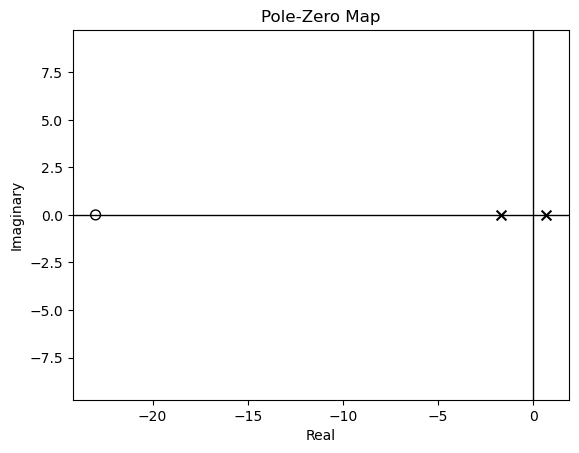

In [56]:
# Plant pole-zero map
control.pzmap(G)
plt.title('Pole-Zero Map')
plt.show()

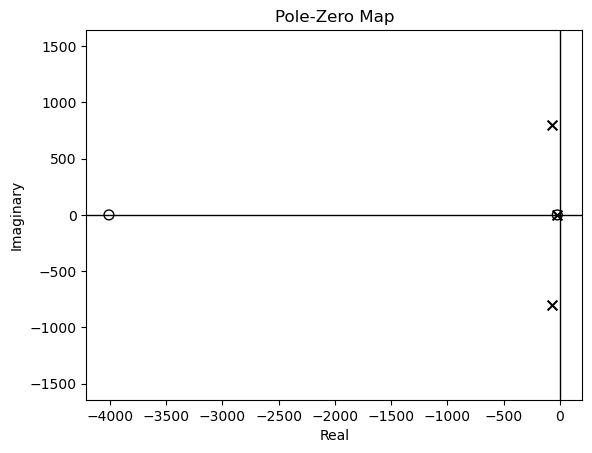

In [57]:
# Plant with the controller in closed loop pole-zero map
control.pzmap(Tf)
plt.title('Pole-Zero Map')
plt.show()

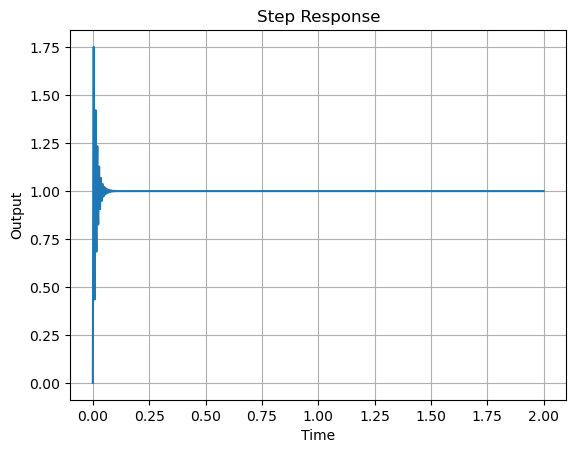

Settling Time (Actual): 0.05578965354812946
Percent Overshoot: 77.48073696317053


In [58]:
# Compute the step response of the closed-loop system to check if it satisfies the closed loop specifications
t = np.linspace(0, 2, 1000)
t, y = control.step_response(Tf, T=t)

# Calculate settling time and percent overshoot
info = control.step_info(Tf)
settling_time_actual = info['SettlingTime']
percent_overshoot = info['Overshoot']

# Plot the step response
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Step Response')
plt.grid(True)
plt.show()

# Print the settling time and percent overshoot
print("Settling Time (Actual):", settling_time_actual)
print("Percent Overshoot:", percent_overshoot)

## This is not desired.

 Since,
$\zeta \omega_n = 80$
$\zeta = 0.454$
and $s^2 + 2\zeta\omega_ns + \omega_n^2$ is the equation of the poles of a second order Transfer Fuunction. 
  
  To check if the poles of the closed-loop transfer function satisfy the angle constraint for the pole to lie on the root locus, we can calculate the pole locations using the given damping ratio (ζ) and natural frequency ($ω_n$).



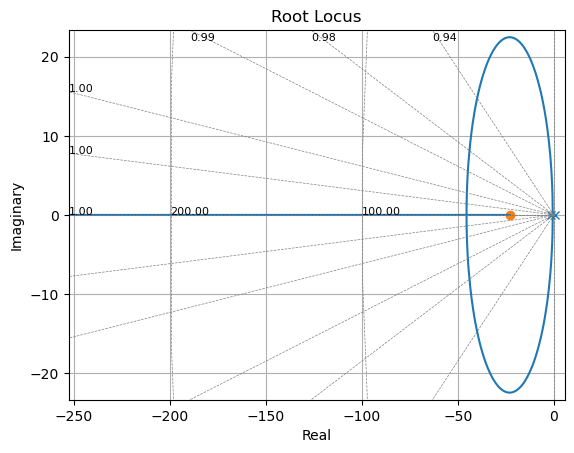

In [25]:
import control

# Define the transfer function
num = [1, 23]
den = [1, 1, -1.19]
G = control.TransferFunction(num, den)

# Plot the root locus
control.root_locus(G)

# Set plot title and labels
plt.title('Root Locus')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid(True)
plt.show()



### Since we want the steady state error is zero for a step input to be zero we increase the Type of system by adding a pole at 0

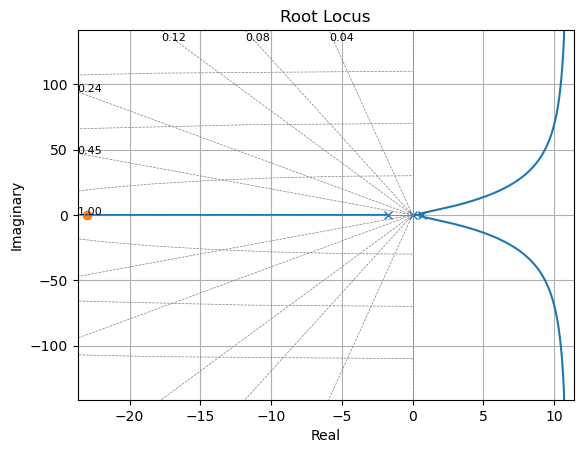

In [59]:
import control

# Define the transfer function
num = [1, 23]
den = [1, 1, -1.19, 0]
G = control.TransferFunction(num, den)

# Plot the root locus
control.root_locus(G)

# Set plot title and labels
plt.title('Root Locus')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid(True)
plt.show()


**By manually caluclating the controller which satisfies the closed loop specifications we ended up with the below controller by choosing a pole on the boundary of the desired region as the closed loop pole**

In [85]:
# Define the transfer function of the controller (C) and the plant (G)
x = 67030
C = control.TransferFunction([1*x, 80*x], [1, 370])

# Define the transfer function
num = [1, 23]
den = [1, 1, -1.19, 0]
G = control.TransferFunction(num, den)

# Calculate the closed-loop transfer function with unity negative feedback
Tf = control.feedback(C * G, 1)

# Calculate the step response characteristics of the closed-loop system
info = control.step_info(Tf)

# Extract the settling time and percent overshoot
settling_time = info['SettlingTime']
percent_overshoot = info['Overshoot']

# Print the closed-loop transfer function, settling time, and percent overshoot
print("Closed-loop Transfer Function:")
print(Tf)
print("Settling Time:", settling_time)
print("Percent Overshoot:", percent_overshoot)


Closed-loop Transfer Function:

       6.703e+04 s^2 + 6.904e+06 s + 1.233e+08
------------------------------------------------------
s^4 + 371 s^3 + 6.74e+04 s^2 + 6.904e+06 s + 1.233e+08

Settling Time: 0.04950540856032637
Percent Overshoot: 51.455055338310764


### We can see that the chosen controller doesnot satisfy the desired controller specifications. there can be number of reasons like:

- In my method, the controller transfer function C is defined with proportional and integral gains of 1*x and 80*x, respectively. The values of x are set to 67030. Since the values of the controller gains significantly affect the closed-loop system's performance, including settling time and overshoot.

- To reduce the overshoot to the desired value of less than 20%, I need to adjust the controller gains. From google I found that I can try tuning the gains manually or using an tuning method like PID tuning algorithms (e.g., Ziegler-Nichols, Cohen-Coon, or model-based methods). 

- But since I don't know any of the above algorithms, I chose to tune them manually and ended up at the controller that satisfy both the specifications

In [90]:
# Define the transfer function of the controller (C) and the plant (G)
x = 67030
C = control.TransferFunction([1*x, 80*x], [1, 362])

# Define the transfer function
num = [1, 23]
den = [1, 1, -1.19, 0]
G = control.TransferFunction(num, den)

# Calculate the closed-loop transfer function with unity negative feedback
Tf = control.feedback(C * G, 1)

# Calculate the step response characteristics of the closed-loop system
info = control.step_info(Tf)

# Extract the settling time and percent overshoot
settling_time = info['SettlingTime']
percent_overshoot = info['Overshoot']

# Print the original overshoot
print("Original Percent Overshoot:", percent_overshoot)

# Adjust the controller gains to reduce the overshoot
C_adjusted = control.TransferFunction([1.3*x, 0.8*x], [1, 362])  # Adjusted controller transfer function

Tf_adjusted = control.feedback(C_adjusted * G, 1)

# Calculate the step response characteristics of the adjusted closed-loop system
info_adjusted = control.step_info(Tf_adjusted)

# Extract the adjusted settling time and percent overshoot
settling_time_adjusted = info_adjusted['SettlingTime']
percent_overshoot_adjusted = info_adjusted['Overshoot']

# Print the adjusted overshoot
print("Adjusted Percent Overshoot:", percent_overshoot_adjusted)
print("SettlingTime:", settling_time)


Original Percent Overshoot: 51.993559821264014
Adjusted Percent Overshoot: 18.945230500641298
SettlingTime: 0.048804681587304506


In [91]:
Tf_adjusted

TransferFunction(array([  87139., 2057821., 1233352.]), array([1.00000000e+00, 3.63000000e+02, 8.74998100e+04, 2.05739022e+06,
       1.23335200e+06]))

## Question 5

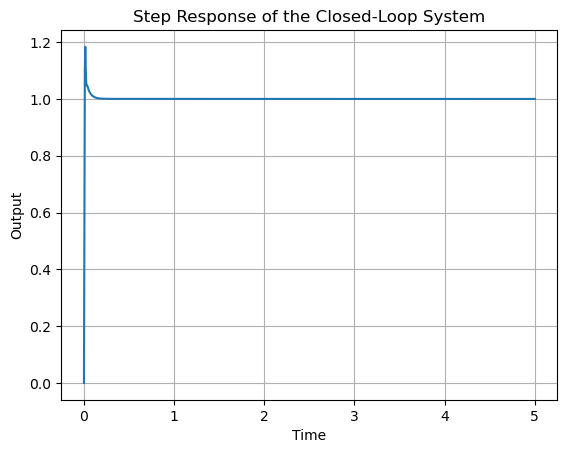

In [95]:
# Generate the step input
t = np.linspace(0, 5, 1000)  # time vector
u = np.ones_like(t)  # step input vector

# Simulate the step response of the closed-loop system
t, y = control.step_response(Tf_adjusted, T=t, input=u)

# Plot the step response
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Step Response of the Closed-Loop System')
plt.grid(True)
plt.show()

## Question 6

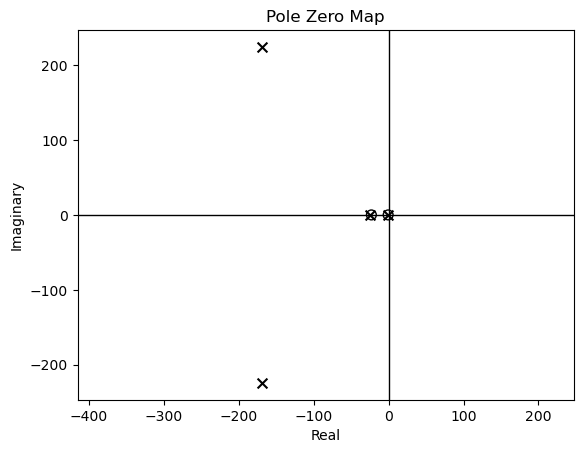

In [94]:
poles, zeroes =  control.pzmap(Tf_adjusted, plot = True)

plt.show()

## Question 8

The transfer function is : 
 
       8.714e+04 s^2 + 2.058e+06 s + 1.233e+06
------------------------------------------------------
s^4 + 363 s^3 + 8.75e+04 s^2 + 2.057e+06 s + 1.233e+06



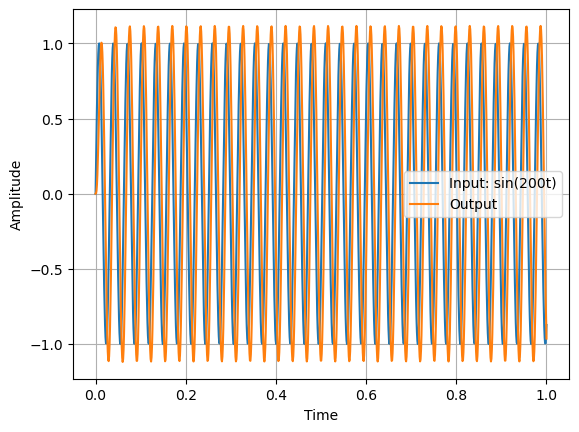

In [93]:
# Define the input signal
t = np.linspace(0, 1, 1000)  # Time vector
u = np.sin(200 * t)  # Input signal

print("The transfer function is : \n" ,Tf_adjusted)

# Simulate the response
t, y = forced_response(Tf_adjusted, T=t, U=u)

# Plot the input and output signals
plt.figure()
plt.plot(t, u, label='Input: sin(200t)')
plt.plot(t, y, label='Output')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

The transfer function is : 
 
      s + 23
------------------
s^3 + s^2 - 1.19 s



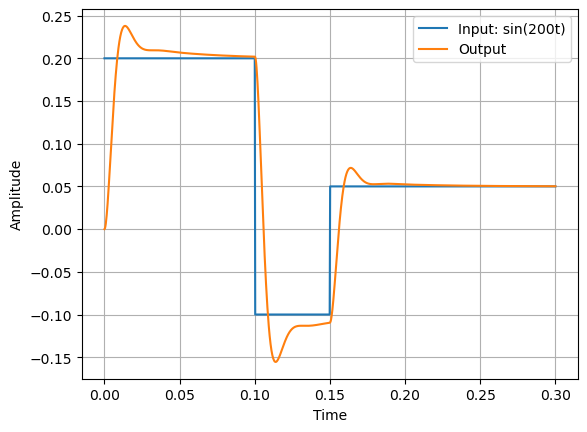

In [92]:
H = control.tf(num, den)
print("The transfer function is : \n" ,H)

# Simulate the response
t, y = forced_response(Tf_adjusted, T=t, U=u)

# Plot the input and output signals
plt.figure()
plt.plot(t, u, label='Input: sin(200t)')
plt.plot(t, y, label='Output')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()